Dataset de análise de dados relacionados à DPOC (Doença Pulmonar Obstrutiva Crônica), que baseia-se em um grupo de doenças pulmonares que obstruem as vias aéreas, dificultando a respiração.
Exemplos de doenças da DPOC:
1- Asma
2- Bronquite crônica
3- Enfisema

O objetivo desse modelo visa classificar a gravidade da DPOC, utilizando dois modelos de Machine Learning> Árvore de Decisão e Floresta Aleatória.

In [27]:
import pandas as pd
import numpy as np

In [28]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/lugialo/copd-model/refs/heads/master/dataset.csv')

In [29]:
dataframe.shape

(101, 24)

In [30]:
dataframe.describe()

,Unnamed: 0,ID,AGE,PackHistory,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,FVC,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
count,101.000000,101.000000,101.00000,101.000000,99.000000,100.000000,100.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.00000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,51.000000,91.405941,70.09901,39.698020,385.858586,390.280000,399.110000,1.603762,58.531485,2.954950,...,40.185842,2.475248,2.19802,0.643564,1.841584,0.207921,0.188119,0.118812,0.198020,0.089109
std,29.300171,51.516246,7.89874,24.558713,104.744199,107.754498,106.550116,0.672763,22.294821,0.976283,...,18.239268,1.109901,0.88340,0.481335,0.366952,0.407844,0.392756,0.325181,0.400495,0.286322
min,1.000000,1.000000,44.00000,1.000000,120.000000,120.000000,120.000000,0.450000,3.290000,1.140000,...,2.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,49.000000,65.00000,20.000000,300.000000,303.750000,303.750000,1.100000,42.000000,2.270000,...,28.410000,1.000000,2.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,87.000000,71.00000,36.000000,419.000000,399.000000,420.000000,1.600000,60.000000,2.770000,...,38.210000,3.000000,2.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,76.000000,143.000000,75.00000,54.000000,460.500000,459.000000,465.250000,1.960000,75.000000,3.630000,...,55.230000,3.000000,3.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,101.000000,169.000000,88.00000,109.000000,688.000000,699.000000,699.000000,3.180000,102.000000,5.370000,...,77.440000,4.000000,4.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    101 non-null    int64  
 1   ID            101 non-null    int64  
 2   AGE           101 non-null    int64  
 3   PackHistory   101 non-null    float64
 4   COPDSEVERITY  101 non-null    object 
 5   MWT1          99 non-null     float64
 6   MWT2          100 non-null    float64
 7   MWT1Best      100 non-null    float64
 8   FEV1          101 non-null    float64
 9   FEV1PRED      101 non-null    float64
 10  FVC           101 non-null    float64
 11  FVCPRED       101 non-null    int64  
 12  CAT           101 non-null    int64  
 13  HAD           101 non-null    float64
 14  SGRQ          101 non-null    float64
 15  AGEquartiles  101 non-null    int64  
 16  copd          101 non-null    int64  
 17  gender        101 non-null    int64  
 18  smoking       101 non-null    

In [32]:
# Corrigindo a coluna Unnamed para passar a ser o indíce.
dataframe.set_index("Unnamed: 0", inplace=True)

dataframe.drop(columns=['ID'], inplace=True)


dataframe.columns

Index(['AGE', 'PackHistory', 'COPDSEVERITY', 'MWT1', 'MWT2', 'MWT1Best',
       'FEV1', 'FEV1PRED', 'FVC', 'FVCPRED', 'CAT', 'HAD', 'SGRQ',
       'AGEquartiles', 'copd', 'gender', 'smoking', 'Diabetes', 'muscular',
       'hypertension', 'AtrialFib', 'IHD'],
      dtype='object')

In [33]:
dataframe.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101],
      dtype='int64', name='Unnamed: 0', length=101)

In [34]:
# Verificando se algum dado está vazio.
dataframe.isnull().sum()

,0
AGE,0
PackHistory,0
COPDSEVERITY,0
MWT1,2
MWT2,1
MWT1Best,1
FEV1,0
FEV1PRED,0
FVC,0
FVCPRED,0


In [35]:
#Preenchendo os campos vazios com as médias:

dataframe.MWT1.fillna(dataframe.MWT1.mean(), inplace=True)

dataframe.MWT2.fillna(dataframe.MWT2.mean(), inplace=True)

dataframe.MWT1Best.fillna(dataframe.MWT1Best.mean(), inplace=True)



<ipython-input-35-0200cd39be42>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe.MWT1.fillna(dataframe.MWT1.mean(), inplace=True)
<ipython-input-35-0200cd39be42>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [36]:
# Verificando se ainda possui algum valor nulo depois do preenchimento.
dataframe.isnull().sum()

,0
AGE,0
PackHistory,0
COPDSEVERITY,0
MWT1,0
MWT2,0
MWT1Best,0
FEV1,0
FEV1PRED,0
FVC,0
FVCPRED,0


In [40]:
# Checando se existe algum valor duplicado nas colunas
dataframe.duplicated().sum()

0

In [39]:
# Dropando as colunas com definições ambíguas
ambiguous_columns = ["copd", "HAD", "smoking", "muscular"]
dataframe.drop(ambiguous_columns, axis=1, inplace=True)

ambiguous_columns2 = ["MWT1", "MWT2"]
dataframe.drop(ambiguous_columns2, axis=1, inplace=True)

In [41]:
# Transformando os valores em string em números, pro modelo ser capaz de processar.
severity_to_map = {"MILD": 0, "MODERATE": 1, "SEVERE": 2, "VERY SEVERE": 3}
dataframe["COPDSEVERITY"] = dataframe["COPDSEVERITY"].map(severity_to_map)
# dataframe["COPDSEVERITY"] = dataframe["COPDSEVERITY"].map(severity_to_map).fillna(-1)


In [42]:
dataframe.isnull().sum()

,0
AGE,0
PackHistory,0
COPDSEVERITY,0
MWT1Best,0
FEV1,0
FEV1PRED,0
FVC,0
FVCPRED,0
CAT,0
SGRQ,0


In [43]:
x=dataframe.drop("COPDSEVERITY", axis=1)
y=dataframe["COPDSEVERITY"]

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [46]:
x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)

In [47]:
# Primeiro modelo - Árvore de decisão
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=42)
DT.fit(x_train_std, y_train)

DecisionTreeClassifier(random_state=42)

In [48]:
y_pred = DT.predict(x_test_std)

In [49]:
# Segundo modelo = Floresta Aleatória
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [50]:
y_pred = forest_model.predict(x_test)

In [51]:
# só fazendo uns testes de exportação =)
from joblib import dump

dump(forest_model, 'random_forest_model.joblib')

dump(DT, 'decision_tree_model.joblib')

['decision_tree_model.joblib']

Métricas para Árvore de Decisão:
Acurácia: 0.7619
Precisão: 0.7868
Recall: 0.7619
F1-score: 0.7573


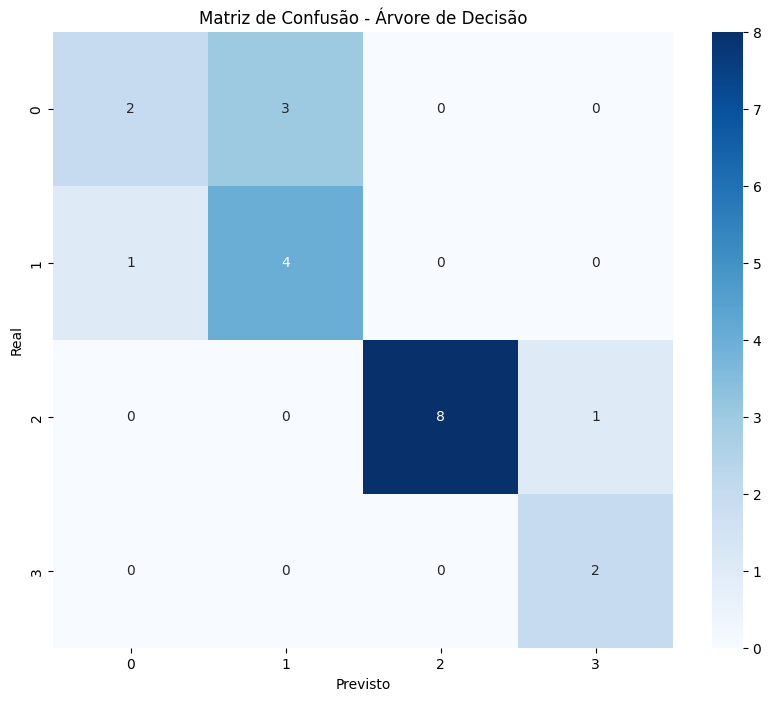

Métricas para Floresta Aleatória:
Acurácia: 0.8571
Precisão: 0.9107
Recall: 0.8571
F1-score: 0.8430


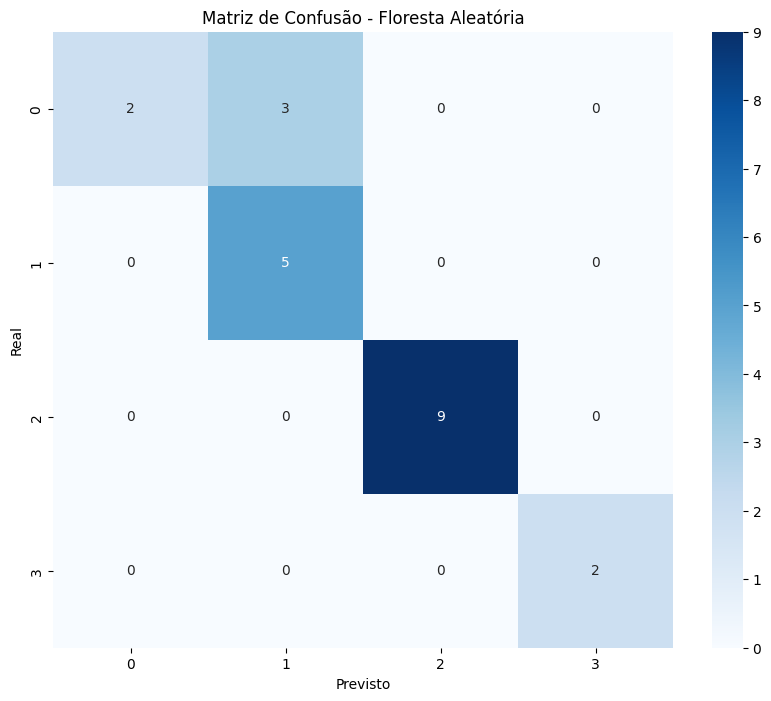

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Métricas para {model_name}:")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

# Avaliando a Árvore de Decisão
evaluate_model(DT, x_test_std, y_test, "Árvore de Decisão")

# Avaliando a Floresta Aleatória
evaluate_model(forest_model, x_test, y_test, "Floresta Aleatória")